# What is the Most Optimal Skill to Learn for Data Analysts?

### Methodology
1. Group skills to determine median salary and likelihood of being in posting
2. Visualize median salary vs percent skill demand
3. Determine if certain technologies are more prevalent

In [1]:
# Importing Libraries
import ast
import pandas as pd
import numpy as np
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\abbas\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Filtering data for Data Analysts in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [3]:
# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US_exploded = df_DA_US.explode('job_skills')

df_DA_US_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [9]:
# Grouping the data by skills and ordering it to get the most popular skills in descending order
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

# Renaming columns for more clarity in analysis moving forward
df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

# Getting how many overall jobs for Data Analysts in the US with yearly salaries where posted
DA_job_count = len(df_DA_US)

# Adding a skill percentage column
df_DA_skills['skill_percent'] = (df_DA_skills['skill_count'] / DA_job_count) * 100

# Filtering for only top skills in demand
skill_limit = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_limit]

df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


### Visualizing the Data

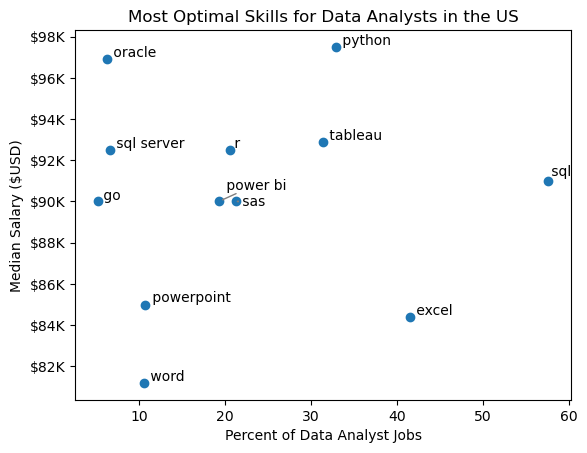

In [10]:
from adjustText import adjust_text

plt.scatter(df_DA_skills_high_demand['skill_percent'], df_DA_skills_high_demand['median_salary'])
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')  # Assuming this is the label you want for y-axis
plt.title('Most Optimal Skills for Data Analysts in the US')

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()

### Coloring by Technology
We're going to add color labels based on technology.

In [12]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['alteryx',
  'excel',
  'word',
  'splunk',
  'qlik',
  'nuix',
  'ssrs',
  'cognos',
  'sap',
  'microstrategy',
  'visio',
  'esquisse',
  'powerpoint',
  'tableau',
  'outlook',
  'sharepoint',
  'spss',
  'looker',
  'msaccess',
  'power bi',
  'sas',
  'ssis',
  'dax',
  'datarobot',
  'sheets',
  'spreadsheet',
  'ms access',
  'powerbi'],
 'programming': ['java',
  'r',
  'vb.net',
  'solidity',
  'dart',
  'scala',
  'clojure',
  'php',
  'powershell',
  'ruby',
  'matlab',
  'javascript',
  'delphi',
  'mongo',
  'rust',
  'visualbasic',
  'c++',
  'typescript',
  'crystal',
  'perl',
  'ocaml',
  'bash',
  'visual basic',
  'pascal',
  'julia',
  'f#',
  'objective-c',
  'go',
  'elixir',
  'golang',
  'sql',
  'shell',
  'apl',
  't-sql',
  'mongodb',
  'fortran',
  'assembly',
  'html',
  'sas',
  'lisp',
  'css',
  'haskell',
  'c',
  'python',
  'no-sql',
  'lua',
  'kotlin',
  'nosql',
  'vba',
  'cobol',
  'c#',
  'erlang',
  'swift',
  'groovy',
  's

In [13]:
# turn dictionary into dataframe
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,alteryx
0,analyst_tools,excel
0,analyst_tools,word
0,analyst_tools,splunk
0,analyst_tools,qlik
...,...,...
9,sync,slack
9,sync,microsoft teams
9,sync,webex
9,sync,zoom


Merges two DataFrames, df_DA_skills and df_technology, based on the columns 'job_skills' and 'skills' respectively, creating a new DataFrame df_DA_skills_tech.

In [14]:
# merge df_DA_skills and df_technology
df_DA_skills_tech = df_DA_skills.merge(df_technology, left_on='job_skills', right_on='skills')

df_DA_skills_tech

,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.0,57.655172,programming,sql
1,1808,84392.0,41.563218,analyst_tools,excel
2,1431,97500.0,32.896552,programming,python
3,1364,92875.0,31.356322,analyst_tools,tableau
4,926,90000.0,21.287356,analyst_tools,sas
...,...,...,...,...,...
169,1,160515.0,0.022989,databases,couchbase
170,1,100000.0,0.022989,libraries,chainer
171,1,85000.0,0.022989,other,chef
172,1,113269.5,0.022989,libraries,cordova


Filters df_DA_skills_tech to select rows where the 'percent' column exceeds a specified threshold, storing the result in df_DA_skills_tech_high_demand.

In [15]:
df_DA_skills_tech_high_demand = df_DA_skills_tech[df_DA_skills_tech['skill_percent'] > skill_limit]

### Plotting the Results

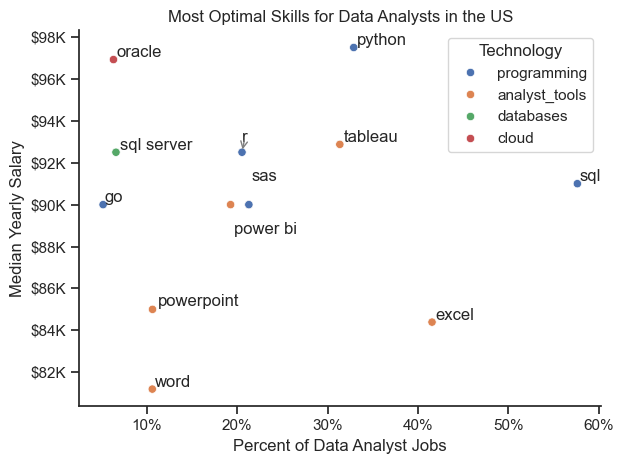

In [21]:
from matplotlib.ticker import PercentFormatter

# Create the scatter plot
sns.scatterplot(
    data=df_DA_skills_tech_high_demand,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

# Customize the appearance
sns.despine()
sns.set_theme(style='ticks')

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    text = plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], 
                    df_DA_skills_high_demand['median_salary'].iloc[i], 
                    txt)
    texts.append(text)
    
    # Manually adjust the 'sas' and 'power bi' labels
    if txt == 'sas':
        text.set_position((df_DA_skills_high_demand['skill_percent'].iloc[i], 
                           df_DA_skills_high_demand['median_salary'].iloc[i] + 1500))  # Move 'sas' up
    elif txt == 'power bi':
        text.set_position((df_DA_skills_high_demand['skill_percent'].iloc[i], 
                           df_DA_skills_high_demand['median_salary'].iloc[i] - 1500))  # Move 'power bi' down

# Adjust remaining text to avoid overlap
adjust_text(texts, 
            arrowprops=dict(arrowstyle='->', color='gray'),
            only_move={'points':'y', 'texts':'y'},  # Move only in y direction
            force_points=0.2,  # Force to avoid overlapping points
            force_text=0.2)    # Force to avoid overlapping text

# Set axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the US')
plt.legend(title='Technology')

# Format the y-axis and x-axis labels
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout and display plot 
plt.tight_layout()
plt.show()